In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize

Larissa Prochnow

Let’s consider a sample of $n$ data points ($x_i$, $y_i$), where $x_i$ is drawn from a uniform distribution
between 0 and 1, and $y_i$ follows a linear function, $y = f (x) = ax + b$, with an additional
Gaussian error of width $σ_y$ added.

We will estimate the slope, $b$, by minimizing a $\chi^2$-distribution:

$$\chi^2 = \sum_i \frac{(y_i-f(x_i))^2}{\sigma_y^2}$$

In [48]:
a = 0.5
b = 1
ex = 1000

1. Provide an estimator for the slope by analytically minimizing the $\chi^2$. (Derivation: see moodle submission)

$$ b = \frac{1}{n}\sum_i^n (y_i-a x_i) = \mu_y - a \mu_x$$

$$ a = \frac{\sum_i^n x_i (y_i-\mu_y)}{\sum_i^n x_i (x_i - \mu_x)} $$



In [49]:
def data(n, a, b, sigma_x, sigma_y):
    x_data = np.random.uniform(0,1,n) + np.random.normal(0,sigma_x,n)
    y_data = a*x_data + b + np.random.normal(0,sigma_y,n)
    mu_x = np.mean(x_data)
    mu_y = np.mean(y_data)
    return x_data, y_data, mu_x, mu_y

In [50]:
def f(x, params): # params = [a,b]
    return params[0]*x + params[1]

def chi2(params, x_data , y_data, sigma_y, sigma_x):
    return np.sum(((y_data - f(x_data, params))/sigma_y)**2)

def minimizing(a, b, x_data, y_data, sigma_y, sigma_x):
    return minimize(chi2,x0=[a,b],args=(x_data, y_data, sigma_y, sigma_x))["x"]

In [51]:
def analytically(x_data, y_data, mu_x, mu_y): #estimator
    a_res = np.sum(x_data*(y_data - mu_y))/np.sum(x_data*(x_data - mu_x)) #slope
    b_res = mu_y - a_res*mu_x
    return a_res, b_res

In [52]:
def bias(a, b, a_res_mean, b_res_mean):
    return a - a_res_mean, b - b_res_mean

2. Next, assume parameters $n = 10$, $a = 0.5$, $b = 1$ and $\sigma_y = 0.05$ and simulate the
experiment $1000$ times, and each time fit for $a$ and $b$. Use a Monte Carlo simulation to evaluate if the estimator is biased.

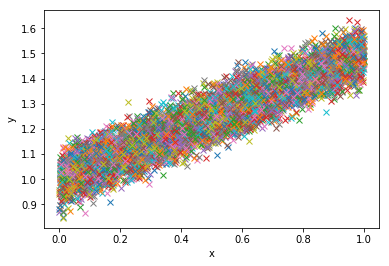

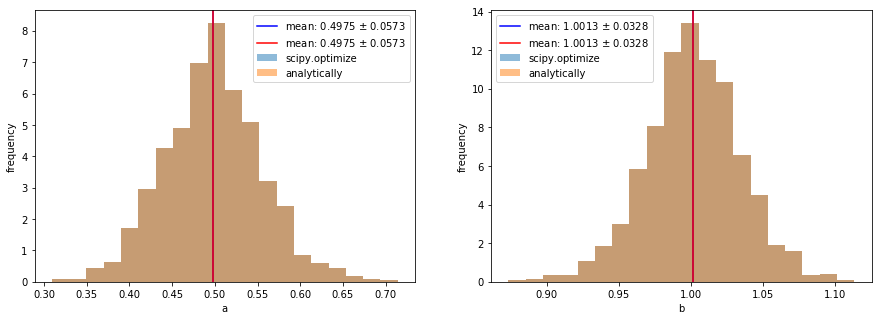

bias a: 0.00247
bias b: -0.00127


In [53]:
n = 10
sigma_x = 0
sigma_y = 0.05

a_res = np.zeros(ex)
b_res = np.zeros(ex)
a_res_a = np.zeros(ex)
b_res_a = np.zeros(ex)
for i in range(ex):
    x_data, y_data, mu_x, mu_y = data(n, a, b, sigma_x, sigma_y)
    a_res[i], b_res[i] = minimizing(a, b, x_data, y_data, sigma_y, sigma_x)
    a_res_a[i], b_res_a[i] = analytically(x_data, y_data, mu_x, mu_y)
    plt.plot(x_data, y_data, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

a_mean = np.mean(a_res)
b_mean = np.mean(b_res)
a_std = np.std(a_res)
b_std = np.std(b_res)

a_mean_a = np.mean(a_res_a)
b_mean_a = np.mean(b_res_a)
a_std_a = np.std(a_res_a)
b_std_a = np.std(b_res_a)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(a_res, bins=20, density=True, alpha=0.5, label='scipy.optimize')
ax[0].hist(a_res_a, bins=20, density=True, alpha=0.5, label='analytically')
ax[0].axvline(a_mean, color='b', label=f'mean: {a_mean:2.4f} $\pm$ {a_std:2.4f}')
ax[0].axvline(a_mean_a, color='r', label=f'mean: {a_mean_a:2.4f} $\pm$ {a_std_a:2.4f}')
ax[0].set_xlabel('a')
ax[0].set_ylabel('frequency')
ax[0].legend()
ax[1].hist(b_res, bins=20, density=True, alpha=0.5, label='scipy.optimize')
ax[1].hist(b_res_a, bins=20, density=True, alpha=0.5, label='analytically')
ax[1].axvline(b_mean, color='b', label=f'mean: {b_mean:2.4f} $\pm$ {b_std:2.4f}')
ax[1].axvline(b_mean_a, color='r', label=f'mean: {b_mean_a:2.4f} $\pm$ {b_std_a:2.4f}')
ax[1].set_xlabel('b')
ax[1].set_ylabel('frequency')
ax[1].legend()
plt.show()

print(f'bias a: {bias(a, b, a_mean_a, b_mean_a)[0]:2.5f}')
print(f'bias b: {bias(a, b, a_mean_a, b_mean_a)[1]:2.5f}')

4. Now add an error in $x$, that is, $x_i$ consists of a ”true” value drawn from the Uniform
distribution and one experimental error drawn from a Gaussian distribution of width $\sigma_x$.

In [54]:
# is already included in 1.

5. Assume parameters $n = 10$, $a = 0.5$, $b = 1$ and $\sigma_y = 0.05$ and $\sigma_x = 0.05$ and simulate
the experiment $1000$ times, and each time fit for a and b

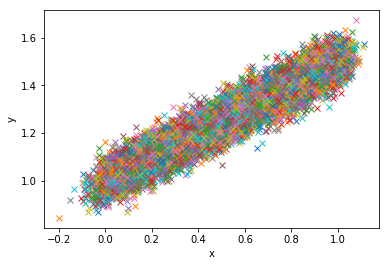

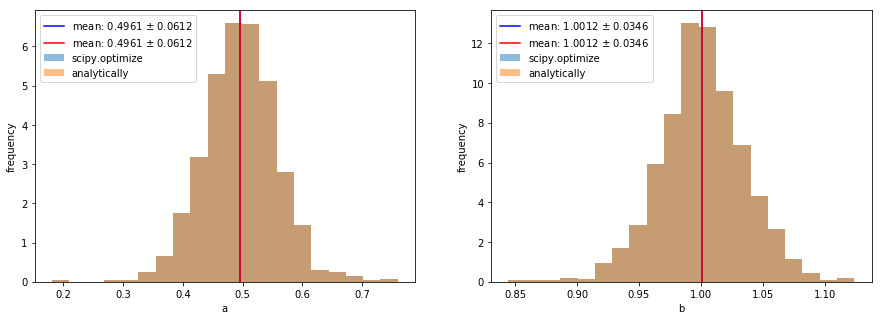

bias a: 0.00386
bias b: -0.00119
bias increases


In [55]:
n = 10
sigma_x = 0.05
sigma_y = 0.05


a_res = np.zeros(ex)
b_res = np.zeros(ex)
a_res_a = np.zeros(ex)
b_res_a = np.zeros(ex)
for i in range(ex):
    x_data, y_data, mu_x, mu_y = data(n, a, b, sigma_x, sigma_y)
    a_res[i], b_res[i] = minimizing(a, b, x_data, y_data, sigma_y, sigma_x)
    a_res_a[i], b_res_a[i] = analytically(x_data, y_data, mu_x, mu_y)
    plt.plot(x_data, y_data, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

a_mean = np.mean(a_res)
b_mean = np.mean(b_res)
a_std = np.std(a_res)
b_std = np.std(b_res)

a_mean_a = np.mean(a_res_a)
b_mean_a = np.mean(b_res_a)
a_std_a = np.std(a_res_a)
b_std_a = np.std(b_res_a)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(a_res, bins=20, density=True, alpha=0.5, label='scipy.optimize')
ax[0].hist(a_res_a, bins=20, density=True, alpha=0.5, label='analytically')
ax[0].axvline(a_mean, color='b', label=f'mean: {a_mean:2.4f} $\pm$ {a_std:2.4f}')
ax[0].axvline(a_mean_a, color='r', label=f'mean: {a_mean_a:2.4f} $\pm$ {a_std_a:2.4f}')
ax[0].set_xlabel('a')
ax[0].set_ylabel('frequency')
ax[0].legend()
ax[1].hist(b_res, bins=20, density=True, alpha=0.5, label='scipy.optimize')
ax[1].hist(b_res_a, bins=20, density=True, alpha=0.5, label='analytically')
ax[1].axvline(b_mean, color='b', label=f'mean: {b_mean:2.4f} $\pm$ {b_std:2.4f}')
ax[1].axvline(b_mean_a, color='r', label=f'mean: {b_mean_a:2.4f} $\pm$ {b_std_a:2.4f}')
ax[1].set_xlabel('b')
ax[1].set_ylabel('frequency')
ax[1].legend()
plt.show()

print(f'bias a: {bias(a, b, a_mean_a, b_mean_a)[0]:2.5f}')
print(f'bias b: {bias(a, b, a_mean_a, b_mean_a)[1]:2.5f}')
print('bias increases')

6. What happens if you set $n = 10$, $a = 0.5$, $b = 1$ and $\sigma_y = 0.2$ and $\sigma_x = 0.2$?

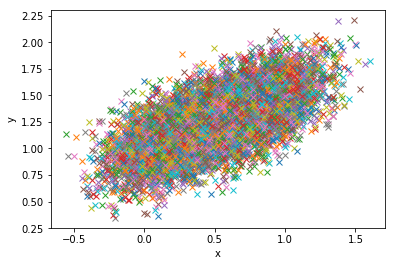

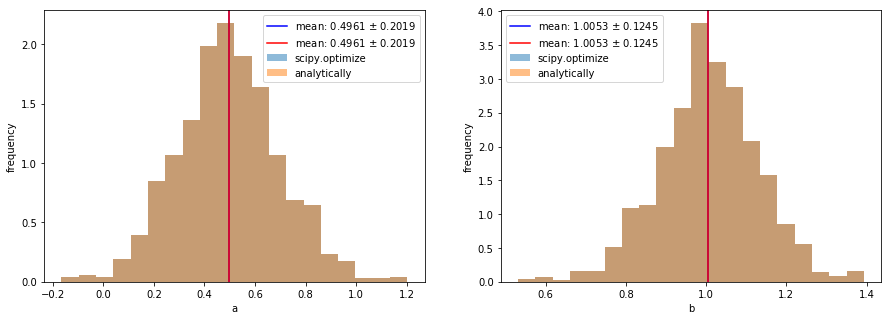

bias a: 0.00386
bias b: -0.00530
bias and uncertainty increased


In [56]:
n = 10
sigma_x = 0.2
sigma_y = 0.2


a_res = np.zeros(ex)
b_res = np.zeros(ex)
a_res_a = np.zeros(ex)
b_res_a = np.zeros(ex)
for i in range(ex):
    x_data, y_data, mu_x, mu_y = data(n, a, b, sigma_x, sigma_y)
    a_res[i], b_res[i] = minimizing(a, b, x_data, y_data, sigma_y, sigma_x)
    a_res_a[i], b_res_a[i] = analytically(x_data, y_data, mu_x, mu_y)
    plt.plot(x_data, y_data, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

a_mean = np.mean(a_res)
b_mean = np.mean(b_res)
a_std = np.std(a_res)
b_std = np.std(b_res)

a_mean_a = np.mean(a_res_a)
b_mean_a = np.mean(b_res_a)
a_std_a = np.std(a_res_a)
b_std_a = np.std(b_res_a)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(a_res, bins=20, density=True, alpha=0.5, label='scipy.optimize')
ax[0].hist(a_res_a, bins=20, density=True, alpha=0.5, label='analytically')
ax[0].axvline(a_mean, color='b', label=f'mean: {a_mean:2.4f} $\pm$ {a_std:2.4f}')
ax[0].axvline(a_mean_a, color='r', label=f'mean: {a_mean_a:2.4f} $\pm$ {a_std_a:2.4f}')
ax[0].set_xlabel('a')
ax[0].set_ylabel('frequency')
ax[0].legend()
ax[1].hist(b_res, bins=20, density=True, alpha=0.5, label='scipy.optimize')
ax[1].hist(b_res_a, bins=20, density=True, alpha=0.5, label='analytically')
ax[1].axvline(b_mean, color='b', label=f'mean: {b_mean:2.4f} $\pm$ {b_std:2.4f}')
ax[1].axvline(b_mean_a, color='r', label=f'mean: {b_mean_a:2.4f} $\pm$ {b_std_a:2.4f}')
ax[1].set_xlabel('b')
ax[1].set_ylabel('frequency')
ax[1].legend()
plt.show()

print(f'bias a: {bias(a, b, a_mean_a, b_mean_a)[0]:2.5f}')
print(f'bias b: {bias(a, b, a_mean_a, b_mean_a)[1]:2.5f}')
print('bias and uncertainty increased')

7. What happens if you increase n?

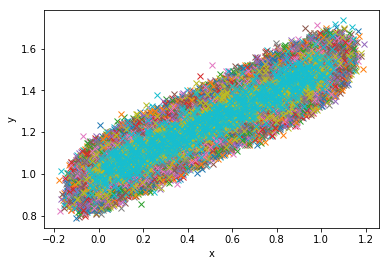

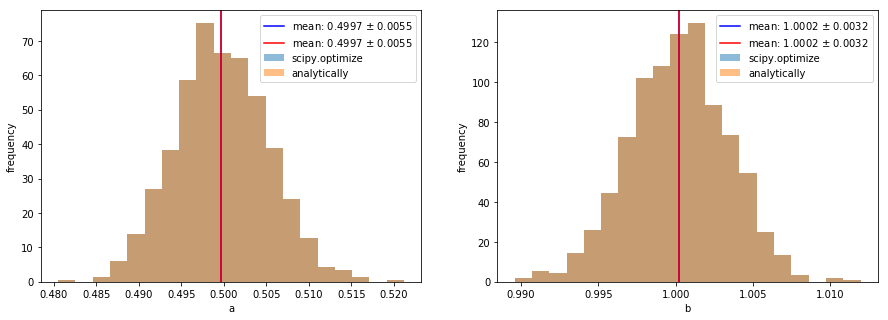

bias a: 0.00027
bias b: -0.00019
bias and uncertainty become smaller


In [63]:
n = 1000
sigma_x = 0.05
sigma_y = 0.05


a_res = np.zeros(ex)
b_res = np.zeros(ex)
a_res_a = np.zeros(ex)
b_res_a = np.zeros(ex)
for i in range(ex):
    x_data, y_data, mu_x, mu_y = data(n, a, b, sigma_x, sigma_y)
    a_res[i], b_res[i] = minimizing(a, b, x_data, y_data, sigma_y, sigma_x)
    a_res_a[i], b_res_a[i] = analytically(x_data, y_data, mu_x, mu_y)
    plt.plot(x_data, y_data, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

a_mean = np.mean(a_res)
b_mean = np.mean(b_res)
a_std = np.std(a_res)
b_std = np.std(b_res)

a_mean_a = np.mean(a_res_a)
b_mean_a = np.mean(b_res_a)
a_std_a = np.std(a_res_a)
b_std_a = np.std(b_res_a)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(a_res, bins=20, density=True, alpha=0.5, label='scipy.optimize')
ax[0].hist(a_res_a, bins=20, density=True, alpha=0.5, label='analytically')
ax[0].axvline(a_mean, color='b', label=f'mean: {a_mean:2.4f} $\pm$ {a_std:2.4f}')
ax[0].axvline(a_mean_a, color='r', label=f'mean: {a_mean_a:2.4f} $\pm$ {a_std_a:2.4f}')
ax[0].set_xlabel('a')
ax[0].set_ylabel('frequency')
ax[0].legend()
ax[1].hist(b_res, bins=20, density=True, alpha=0.5, label='scipy.optimize')
ax[1].hist(b_res_a, bins=20, density=True, alpha=0.5, label='analytically')
ax[1].axvline(b_mean, color='b', label=f'mean: {b_mean:2.4f} $\pm$ {b_std:2.4f}')
ax[1].axvline(b_mean_a, color='r', label=f'mean: {b_mean_a:2.4f} $\pm$ {b_std_a:2.4f}')
ax[1].set_xlabel('b')
ax[1].set_ylabel('frequency')
ax[1].legend()
plt.show()

print(f'bias a: {bias(a, b, a_mean_a, b_mean_a)[0]:2.5f}')
print(f'bias b: {bias(a, b, a_mean_a, b_mean_a)[1]:2.5f}')
print('bias and uncertainty become smaller')

8. Discuss if the estimator is biased and/or consistent.

- numarically = analytically
- is unbiased: small values for bias, symmetric distribution (not biased if $\langle a \rangle = a_{real}$)
- consistent because the mean is close to the true value and the uncertainty becomes smaller with increasing n

# Appendix

## $\sigma_x$ erhöhen führt zu kleineren Unsicherheiten in $a$ und $b$

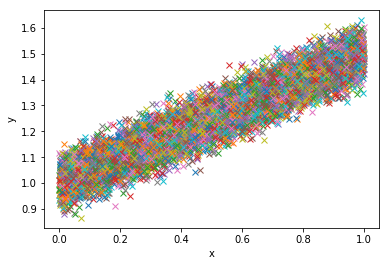

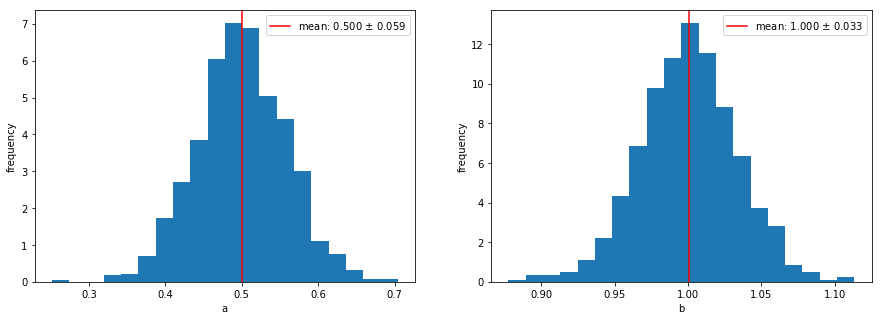

In [64]:
n = 10
sigma_x = 0
sigma_y = 0.05


a_res = np.zeros(ex)
b_res = np.zeros(ex)
for i in range(ex):
    x_data, y_data, _, _ = data(n, a, b, sigma_x, sigma_y)
    a_res[i], b_res[i] = minimizing(a, b, x_data, y_data, sigma_y, sigma_x)
    plt.plot(x_data, y_data, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

a_mean = np.mean(a_res)
b_mean = np.mean(b_res)
a_std = np.std(a_res)
b_std = np.std(b_res)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(a_res, bins=20, density=True)
ax[0].axvline(a_mean, color='r', label=f'mean: {a_mean:2.3f} $\pm$ {a_std:2.3f}')
ax[0].set_xlabel('a')
ax[0].set_ylabel('frequency')
ax[0].legend()
ax[1].hist(b_res, bins=20, density=True)
ax[1].axvline(b_mean, color='r', label=f'mean: {b_mean:2.3f} $\pm$ {b_std:2.3f}')
ax[1].set_xlabel('b')
ax[1].set_ylabel('frequency')
ax[1].legend()
plt.show()

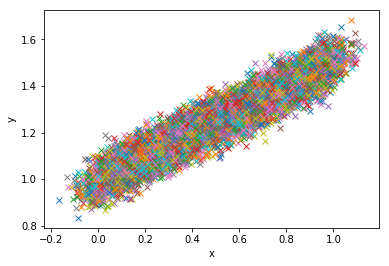

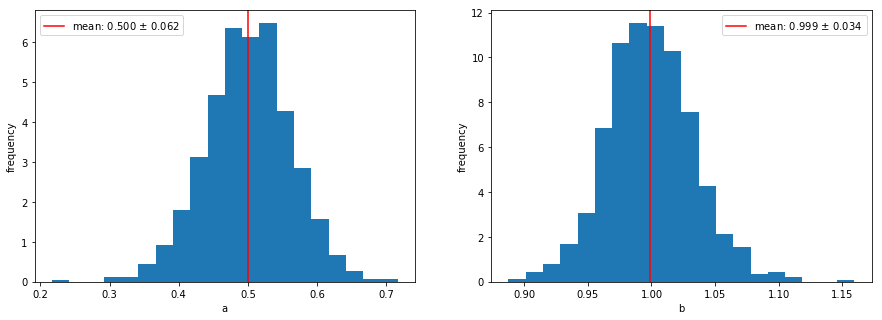

In [65]:
n = 10
sigma_x = 0.05
sigma_y = 0.05


a_res = np.zeros(ex)
b_res = np.zeros(ex)
for i in range(ex):
    x_data, y_data, _, _ = data(n, a, b, sigma_x, sigma_y)
    a_res[i], b_res[i] = minimizing(a, b, x_data, y_data, sigma_y, sigma_x)
    plt.plot(x_data, y_data, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

a_mean = np.mean(a_res)
b_mean = np.mean(b_res)
a_std = np.std(a_res)
b_std = np.std(b_res)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(a_res, bins=20, density=True)
ax[0].axvline(a_mean, color='r', label=f'mean: {a_mean:2.3f} $\pm$ {a_std:2.3f}')
ax[0].set_xlabel('a')
ax[0].set_ylabel('frequency')
ax[0].legend()
ax[1].hist(b_res, bins=20, density=True)
ax[1].axvline(b_mean, color='r', label=f'mean: {b_mean:2.3f} $\pm$ {b_std:2.3f}')
ax[1].set_xlabel('b')
ax[1].set_ylabel('frequency')
ax[1].legend()
plt.show()

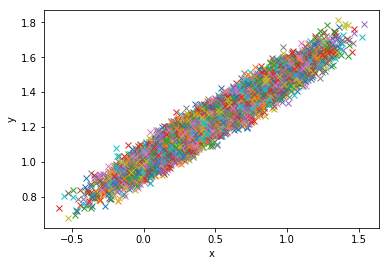

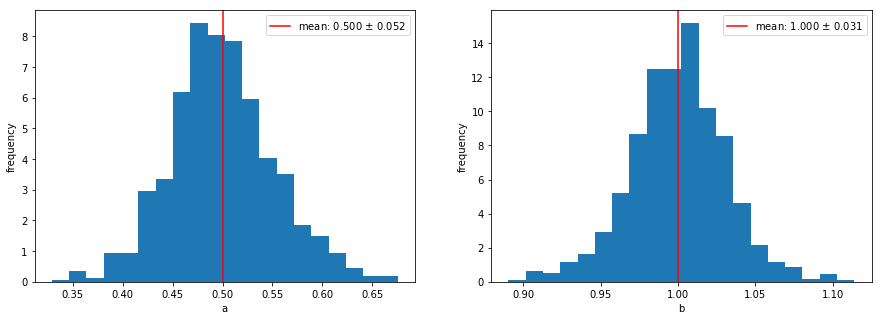

In [66]:
n = 10
sigma_x = 0.2
sigma_y = 0.05


a_res = np.zeros(ex)
b_res = np.zeros(ex)
for i in range(ex):
    x_data, y_data, _, _ = data(n, a, b, sigma_x, sigma_y)
    a_res[i], b_res[i] = minimizing(a, b, x_data, y_data, sigma_y, sigma_x)
    plt.plot(x_data, y_data, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

a_mean = np.mean(a_res)
b_mean = np.mean(b_res)
a_std = np.std(a_res)
b_std = np.std(b_res)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(a_res, bins=20, density=True)
ax[0].axvline(a_mean, color='r', label=f'mean: {a_mean:2.3f} $\pm$ {a_std:2.3f}')
ax[0].set_xlabel('a')
ax[0].set_ylabel('frequency')
ax[0].legend()
ax[1].hist(b_res, bins=20, density=True)
ax[1].axvline(b_mean, color='r', label=f'mean: {b_mean:2.3f} $\pm$ {b_std:2.3f}')
ax[1].set_xlabel('b')
ax[1].set_ylabel('frequency')
ax[1].legend()
plt.show()

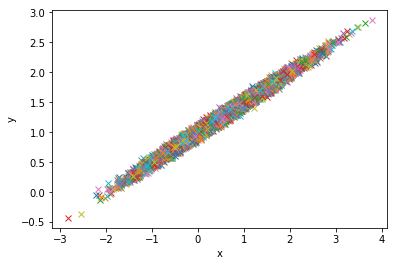

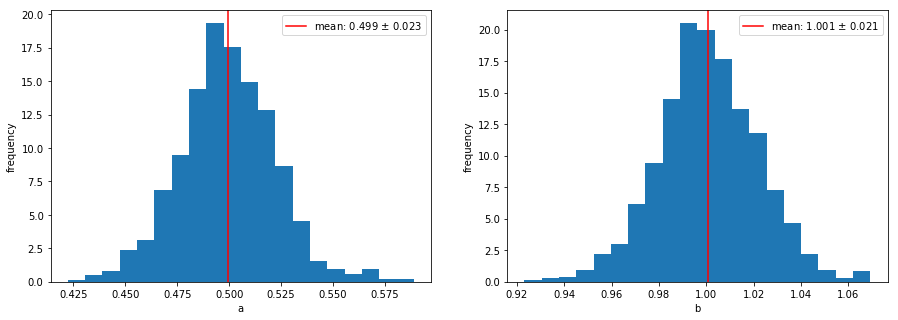

In [67]:
n = 10
sigma_x = 0.8
sigma_y = 0.05


a_res = np.zeros(ex)
b_res = np.zeros(ex)
for i in range(ex):
    x_data, y_data, _, _ = data(n, a, b, sigma_x, sigma_y)
    a_res[i], b_res[i] = minimizing(a, b, x_data, y_data, sigma_y, sigma_x)
    plt.plot(x_data, y_data, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

a_mean = np.mean(a_res)
b_mean = np.mean(b_res)
a_std = np.std(a_res)
b_std = np.std(b_res)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(a_res, bins=20, density=True)
ax[0].axvline(a_mean, color='r', label=f'mean: {a_mean:2.3f} $\pm$ {a_std:2.3f}')
ax[0].set_xlabel('a')
ax[0].set_ylabel('frequency')
ax[0].legend()
ax[1].hist(b_res, bins=20, density=True)
ax[1].axvline(b_mean, color='r', label=f'mean: {b_mean:2.3f} $\pm$ {b_std:2.3f}')
ax[1].set_xlabel('b')
ax[1].set_ylabel('frequency')
ax[1].legend()
plt.show()

## $\sigma_y$ erhöhen führt zu größeren Unsicherheiten in $a$ und $b$

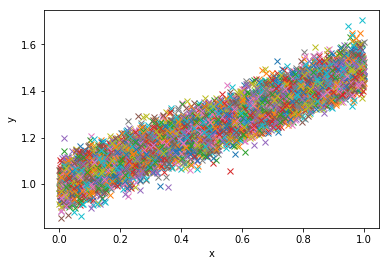

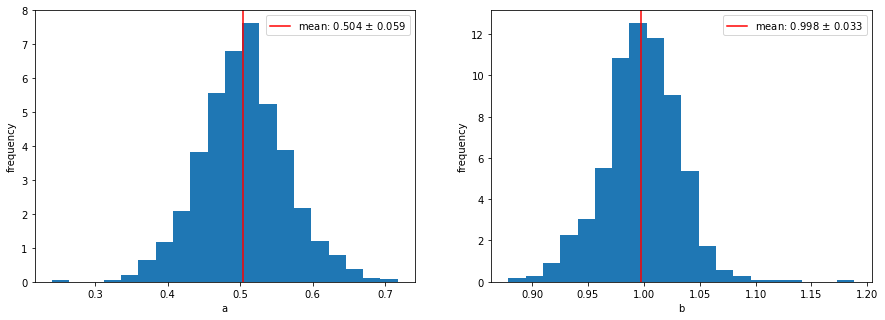

In [68]:
n = 10
sigma_x = 0
sigma_y = 0.05


a_res = np.zeros(ex)
b_res = np.zeros(ex)
for i in range(ex):
    x_data, y_data, _, _ = data(n, a, b, sigma_x, sigma_y)
    a_res[i], b_res[i] = minimizing(a, b, x_data, y_data, sigma_y, sigma_x)
    plt.plot(x_data, y_data, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

a_mean = np.mean(a_res)
b_mean = np.mean(b_res)
a_std = np.std(a_res)
b_std = np.std(b_res)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(a_res, bins=20, density=True)
ax[0].axvline(a_mean, color='r', label=f'mean: {a_mean:2.3f} $\pm$ {a_std:2.3f}')
ax[0].set_xlabel('a')
ax[0].set_ylabel('frequency')
ax[0].legend()
ax[1].hist(b_res, bins=20, density=True)
ax[1].axvline(b_mean, color='r', label=f'mean: {b_mean:2.3f} $\pm$ {b_std:2.3f}')
ax[1].set_xlabel('b')
ax[1].set_ylabel('frequency')
ax[1].legend()
plt.show()

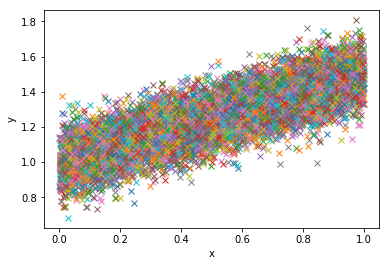

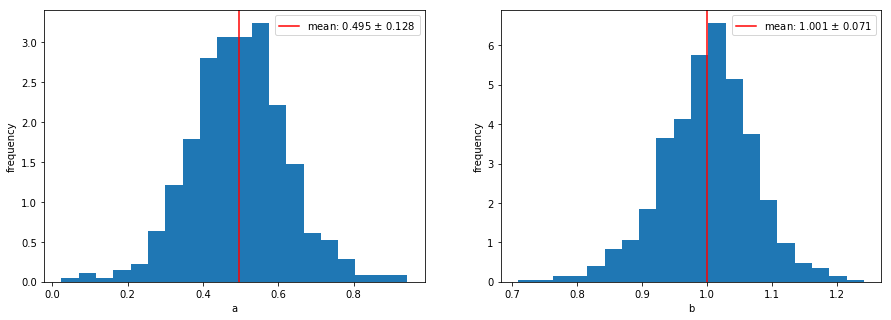

In [69]:
n = 10
sigma_x = 0
sigma_y = 0.1


a_res = np.zeros(ex)
b_res = np.zeros(ex)
for i in range(ex):
    x_data, y_data, _, _ = data(n, a, b, sigma_x, sigma_y)
    a_res[i], b_res[i] = minimizing(a, b, x_data, y_data, sigma_y, sigma_x)
    plt.plot(x_data, y_data, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

a_mean = np.mean(a_res)
b_mean = np.mean(b_res)
a_std = np.std(a_res)
b_std = np.std(b_res)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(a_res, bins=20, density=True)
ax[0].axvline(a_mean, color='r', label=f'mean: {a_mean:2.3f} $\pm$ {a_std:2.3f}')
ax[0].set_xlabel('a')
ax[0].set_ylabel('frequency')
ax[0].legend()
ax[1].hist(b_res, bins=20, density=True)
ax[1].axvline(b_mean, color='r', label=f'mean: {b_mean:2.3f} $\pm$ {b_std:2.3f}')
ax[1].set_xlabel('b')
ax[1].set_ylabel('frequency')
ax[1].legend()
plt.show()

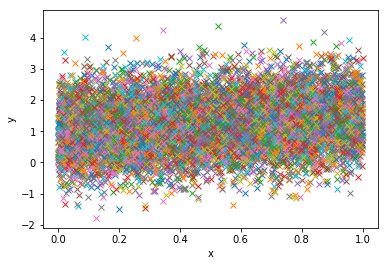

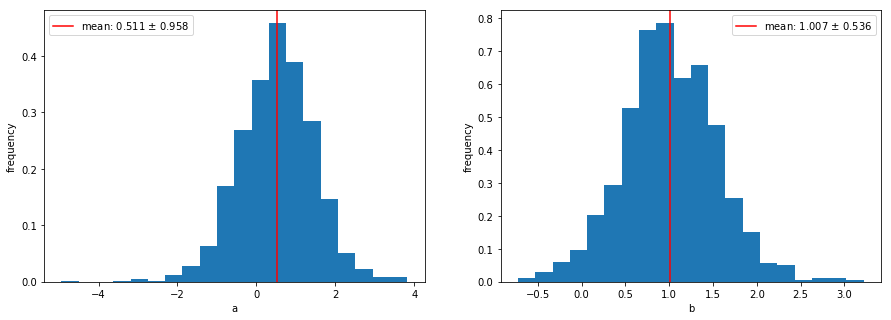

In [70]:
n = 10
sigma_x = 0
sigma_y = 0.8


a_res = np.zeros(ex)
b_res = np.zeros(ex)
for i in range(ex):
    x_data, y_data, _, _ = data(n, a, b, sigma_x, sigma_y)
    a_res[i], b_res[i] = minimizing(a, b, x_data, y_data, sigma_y, sigma_x)
    plt.plot(x_data, y_data, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

a_mean = np.mean(a_res)
b_mean = np.mean(b_res)
a_std = np.std(a_res)
b_std = np.std(b_res)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(a_res, bins=20, density=True)
ax[0].axvline(a_mean, color='r', label=f'mean: {a_mean:2.3f} $\pm$ {a_std:2.3f}')
ax[0].set_xlabel('a')
ax[0].set_ylabel('frequency')
ax[0].legend()
ax[1].hist(b_res, bins=20, density=True)
ax[1].axvline(b_mean, color='r', label=f'mean: {b_mean:2.3f} $\pm$ {b_std:2.3f}')
ax[1].set_xlabel('b')
ax[1].set_ylabel('frequency')
ax[1].legend()
plt.show()